# Task 1 : Data preparation and customer analytics

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

To get started, download the resource csv data files below and begin performing high-level data checks such as:

- Creating and interpreting high-level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [1]:
#IMPORT THE LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import xlrd
import re

#   Ignoring any warnings.|

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Load the Dataset

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv',na_values='?',skipinitialspace=True)

In [3]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Descriptive Analytics: Summary statistics, visualizations

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We need to convert `DATE column` from int64 to `Datetime` datatype. 

In [7]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin = "1899-12-30", unit="D")

In [8]:
transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [9]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Missing Values

In [10]:
purchase.isna().sum().sum()

0

In [11]:
transaction.isna().sum().sum()

0

Both the Datasets has `No Null` values.

In [12]:
# don't need the 175g in PROD_NAME columns so removing it using str.rstrip.

# transaction['PROD_NAME'] = transaction['PROD_NAME'].str.rstrip('175g')
# print("\nDataFrame after rstrip:")
# transaction.head(2)

### Checking for Outliers

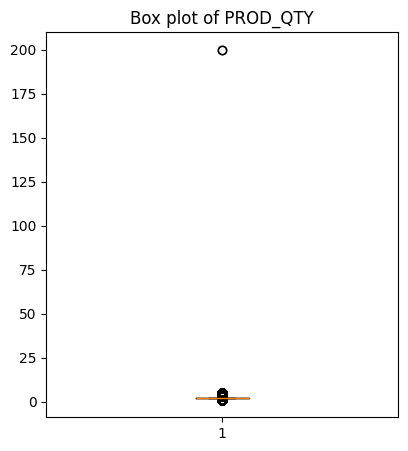

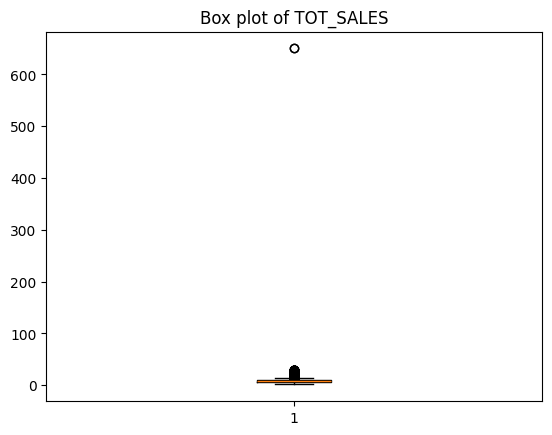

In [13]:
# Using a box plot to visualize outliers.

plt.figure(figsize=(10, 5))

# Box plot for feature1
plt.subplot(1, 2, 1)
plt.boxplot(transaction['PROD_QTY'])
plt.title('Box plot of PROD_QTY')
plt.show()

# Box plot for feature2
plt.subplot(1, 1, 1)
plt.boxplot(transaction['TOT_SALES'])
plt.title('Box plot of TOT_SALES')

plt.show()


After Visualizing Box plot for the column `PROD_QTY` and `TOT_SALES`, we can see there are some outliers present in the data.

In [14]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


### Removing the Outliers

In [16]:
transaction = transaction[transaction["PROD_QTY"]<100]
transaction = transaction[transaction["TOT_SALES"]<500]
transaction = transaction.reset_index(drop=True)

In [17]:
transaction.shape

(264834, 8)

After removing outliers from `PROD_QTY` and `TOT_SALES`, we can spot two rows have been removed. Now the analysis will be slightly more accurate.

In [18]:
df = pd.merge(transaction, purchase, on="LYLTY_CARD_NBR")   #   Merging the two pandas.DataFrames into one on the basis of the LYLTY_CARD_NBR column.
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


### Pack Size
- Extracting package sizes from `PROD_NAME`.

In [19]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace('SeaSalt', 'SeaSalt ')
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget


In [20]:
df["PROD_SIZE"]= df["PROD_NAME"].str.extract(r'(\d+)[gG]')   #   Extracting the package sizes from the product names, and storing them in a separate column. 
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175


In [21]:
df['PROD_NAME'] = df['PROD_NAME'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175


In [22]:
unique_products = list(df["PROD_NAME"].unique()) 
print("Total Unique Products:", len(unique_products))

Total Unique Products: 114


In [23]:
df["BRAND_NAME"]= df["PROD_NAME"].str.split().str[0]
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs


In [24]:
df = df[['DATE','STORE_NBR','LYLTY_CARD_NBR','PROD_NBR','PROD_NAME','PROD_SIZE','BRAND_NAME','PROD_QTY','TOT_SALES','LIFESTAGE','PREMIUM_CUSTOMER']]
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,5,Natural Chip Compny SeaSalt,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,66,CCs Nacho Cheese,175,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,96,WW Original Stacked Chips,160,WW,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,54,CCs Original,175,CCs,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,61,Smiths Crinkle Cut Chips Chicken,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [25]:
df['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

- As we can see the typo error here `Dorito` and it's considering it a separate brand than `Doritos`. let's fix this.

In [26]:
# df['BRAND_NAME'] = df['BRAND_NAME'].replace('Dorito', 'Doritos', inplace= True)
df.loc[df['BRAND_NAME'] == 'Dorito', 'BRAND_NAME'] = 'Doritos'

In [27]:
df['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        28860
Doritos       28145
Pringles      25102
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [28]:
# Sorting the data according to the date column

df = df.sort_values(by="DATE").reset_index(drop=True)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,27,27181,70,Tyrrells Crisps Lightly Salted,165,Tyrrells,2,8.4,RETIREES,Budget
1,2018-07-01,191,191099,103,RRD Steak & Chimuchurri,150,RRD,2,5.4,YOUNG FAMILIES,Budget
2,2018-07-01,257,257010,24,Grain Waves Sweet Chilli,210,Grain,2,7.2,YOUNG FAMILIES,Premium
3,2018-07-01,48,48129,114,Kettle Sensations Siracha Lime,150,Kettle,2,9.2,OLDER FAMILIES,Mainstream
4,2018-07-01,203,203013,23,Cheezels Cheese,330,Cheezels,2,11.4,MIDAGE SINGLES/COUPLES,Budget


In [29]:
df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69689
Name: count, dtype: int64

- `Mainstream` : the largest group of customers does not specifically aim for either the cheapest options or premium options.(The Majority of transactions made by this group)
- `Budget` : The next largest group (93,157 transactions) is made by Budget customers who are likely looking for cost-effective options.
- `Premium Customers`: The smallest group (69,689 transactions) is made by Premium customers who are likely purchasing higher-end, more expensive products.

In [30]:
# Calculate total spend per customer segment
total_spend_by_segment = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Display the result
total_spend_by_segment

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506158.95


#### Grouping `Date` by `TOT_SALES` Column

In [31]:
Date_sales = df.groupby('DATE')['TOT_SALES'].sum().reset_index()
Date_sales.head()

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9


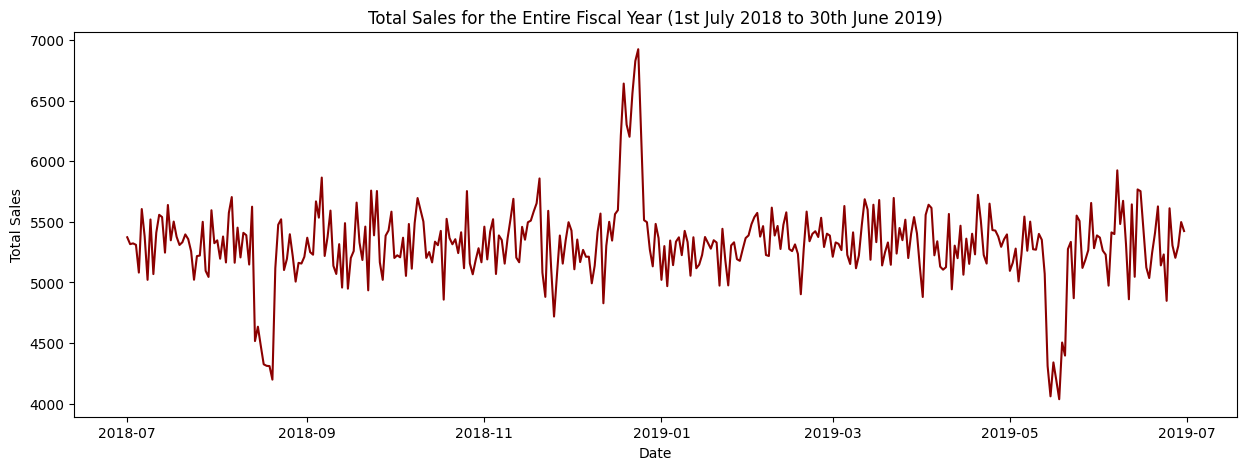

In [32]:
#   Plotting a line graph of the total sales for each date over the entire recorded duration.

plt.figure(figsize=(15, 5))
plt.plot(Date_sales["DATE"], Date_sales["TOT_SALES"], color="darkred")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

- There is a significant spike occured around the end of December2018 and Beginning of January2019 in total sales, possibly due to Christmas and Newyear and their Promotions.
- There are some sudden drops but recovered quick, could be due stockouts, supply chain issues or short term market conditions. 

#### As the client is particularly interested in customer segments and their chip purchasing behaviour. 
- Let's draw insights on who spends on chips and what drives spends for each customer segment.

In [33]:
# Frequency of Purchase of Chips
df_chips = df[df['PROD_NAME'].str.contains('chips', case=False)] # filtering transactions where chips were purchased.

In [34]:
df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
6,2018-07-01,241,241226,61,Smiths Crinkle Cut Chips Chicken,170,Smiths,2,5.8,YOUNG FAMILIES,Budget
18,2018-07-01,262,262057,96,WW Original Stacked Chips,160,WW,2,3.8,YOUNG FAMILIES,Budget
21,2018-07-01,197,197053,75,Cobs Popd Sea Salt Chips,110,Cobs,2,7.6,OLDER SINGLES/COUPLES,Premium
31,2018-07-01,75,75221,2,Cobs Popd Sour Crm &Chives Chips,110,Cobs,2,7.6,OLDER FAMILIES,Mainstream
34,2018-07-01,207,207096,44,Thins Chips Light& Tangy,175,Thins,2,6.6,YOUNG FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264806,2019-06-30,240,240095,75,Cobs Popd Sea Salt Chips,110,Cobs,2,7.6,RETIREES,Mainstream
264807,2019-06-30,1,1244,75,Cobs Popd Sea Salt Chips,110,Cobs,2,7.6,RETIREES,Budget
264812,2019-06-30,175,175371,40,Thins Chips Seasonedchicken,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Budget
264824,2019-06-30,55,55235,44,Thins Chips Light& Tangy,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Mainstream


In [50]:
# Total Spend on Chips according to PREMIUM_CUSTOMER 

total_spend_chips_by_customer = df_chips.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
total_spend_chips_by_customer

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,118019.4
1,Mainstream,130709.1
2,Premium,87228.8


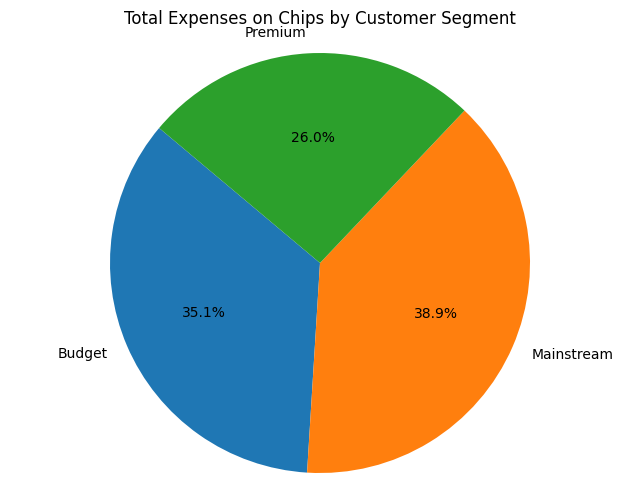

In [51]:
# Assuming total_spend_by_segment is your DataFrame containing total spend by each customer segment
labels = total_spend_chips_by_customer['PREMIUM_CUSTOMER']
sizes = total_spend_chips_by_customer['TOT_SALES']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Expenses on Chips by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- `Mainstream` customers spends about 39%, `Budget` customers spends about 35% & `Premium` customers spends least about 26%.   

In [52]:
# Total Spends on Chips according to LIFESTAGE

total_spend_chips_by_customer = df_chips.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
total_spend_chips_by_customer


,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,31923.2
1,NEW FAMILIES,8607.4
2,OLDER FAMILIES,61508.9
3,OLDER SINGLES/COUPLES,69934.1
4,RETIREES,63348.9
5,YOUNG FAMILIES,55025.1
6,YOUNG SINGLES/COUPLES,45609.7


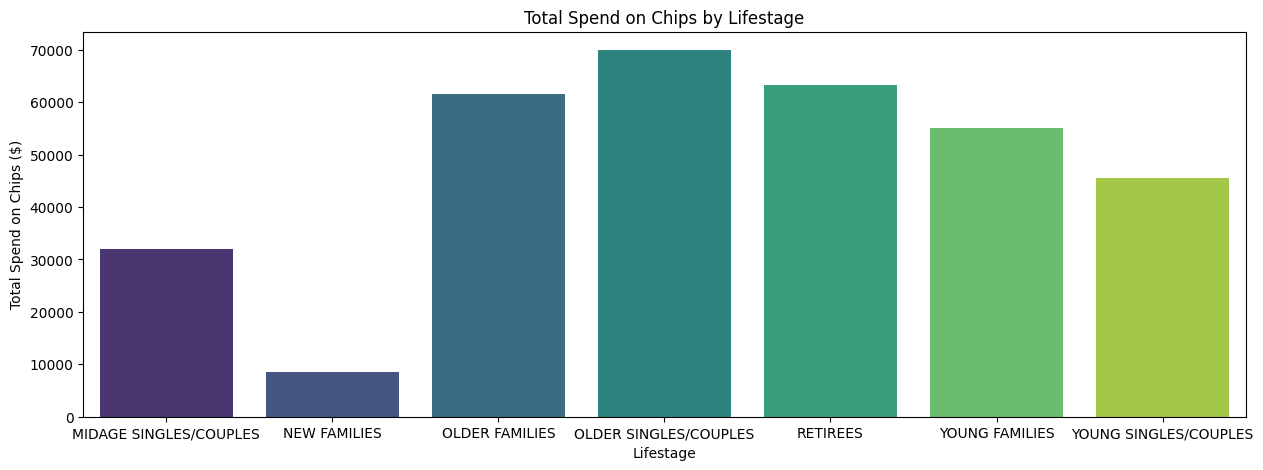

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=total_spend_chips_by_customer, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Total Spend on Chips ($)')
plt.title('Total Spend on Chips by Lifestage')

plt.show()

- `OLDER FAMILIES & OLDER SINGLES/COUPLES`: these group spends (nearly 70000$) highest on chips, they are the biggest consumers of chips.
- `Retirees`: this segment also spends a significant amount on chips, another major consumer.
- `YOUNG FAMILIES`: they have moderate level of spending on chips.
- `YOUNG SINGLES/COUPLES & MIDAGE SINGLES/COUPLES`: these groups have lower spend on chips compared to older segments and young famlies.
- `NEW FAMILIES`: This segment has the lowest total spend on chips, they consume the least amount of chips among these life stages.

** Older Families may have more members so they naturally consume more snacks like chips due to having more members. Though younger families might have children, they might be more health-conscious about their children's diet or they are most likely to save there income for future.
Older Families might have more social gatherings or events where chips are commonly consumed and Yonger families are most likely busy at work or engaged in activities outside the home so they consume less snacks.**

In [42]:
df_chips['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     10268
RETIREES                   9338
OLDER FAMILIES             9097
YOUNG FAMILIES             8160
YOUNG SINGLES/COUPLES      6885
MIDAGE SINGLES/COUPLES     4733
NEW FAMILIES               1289
Name: count, dtype: int64

In [54]:
# Total sales for each package size (product size) 

total_sales_per_pack_size = df_chips.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()

total_sales_per_pack_size.head()

,PROD_SIZE,TOT_SALES
0,110,70569.8
1,160,10647.6
2,170,112396.4
3,175,96781.5
4,200,10757.8


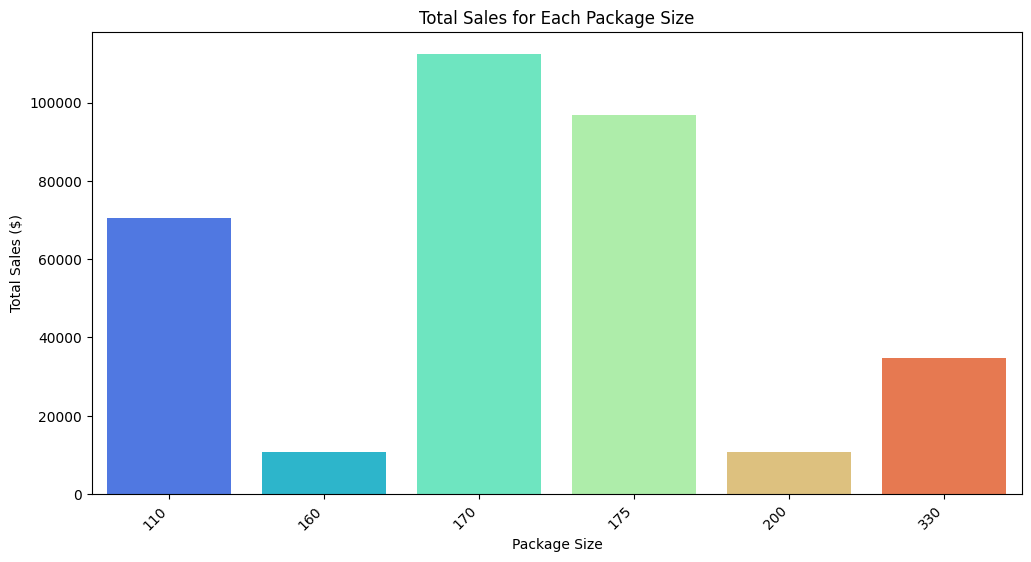

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_SIZE', y='TOT_SALES', data=total_sales_per_pack_size, palette='rainbow')
plt.xlabel('Package Size')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales for Each Package Size')
plt.xticks(rotation=45, ha='right')

plt.show()

- The `170g` package size has the highest total sales, most popular among the consumers. The `175g` size also show high sales, it's popular choices as well.
- The package sizes like `110g, 200g, 160g, 330g` have moderate sales but still have a significant market presence.

In [58]:
# The total sales for each LIFESTAGE and PREMIUM_CUSTOMER

Total_sales_by_lifestage_and_customer = df_chips.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

Total_sales_by_lifestage_and_customer

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,6386.0
1,MIDAGE SINGLES/COUPLES,Mainstream,15804.5
2,MIDAGE SINGLES/COUPLES,Premium,9732.7
3,NEW FAMILIES,Budget,3805.8
4,NEW FAMILIES,Mainstream,2782.7
5,NEW FAMILIES,Premium,2018.9
6,OLDER FAMILIES,Budget,29390.7
7,OLDER FAMILIES,Mainstream,18244.2
8,OLDER FAMILIES,Premium,13874.0
9,OLDER SINGLES/COUPLES,Budget,23674.7


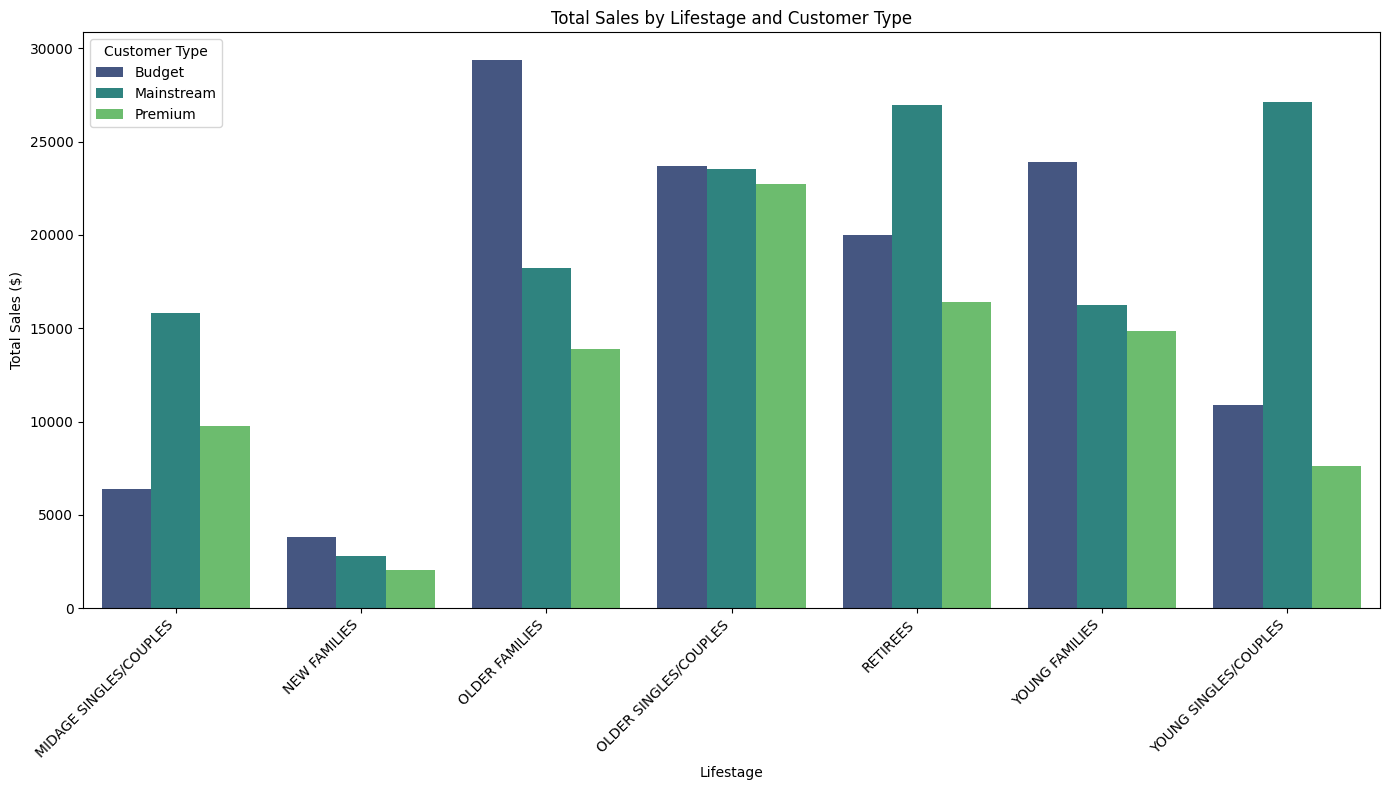

In [59]:
plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=Total_sales_by_lifestage_and_customer, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Lifestage and Customer Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

- As we can see the `OLDER FAMILIES`, `OLDER SINGLES/COUPLES` & `RETIREES`(Loyal Customers) have already strong sales in Mainstream and Premium so we should offer them exclusive deals.
- we should increase engagement with Buget customers, particularly in `NEW FAMILIES`, `MIDAGE SINGLES/COUPLES` & `YOUNG SINGLES/COUPLES`, through discounts, value packs, and special promotions.

In [60]:
# Total Sales by Brand

total_sales_by_brand = df_chips.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()

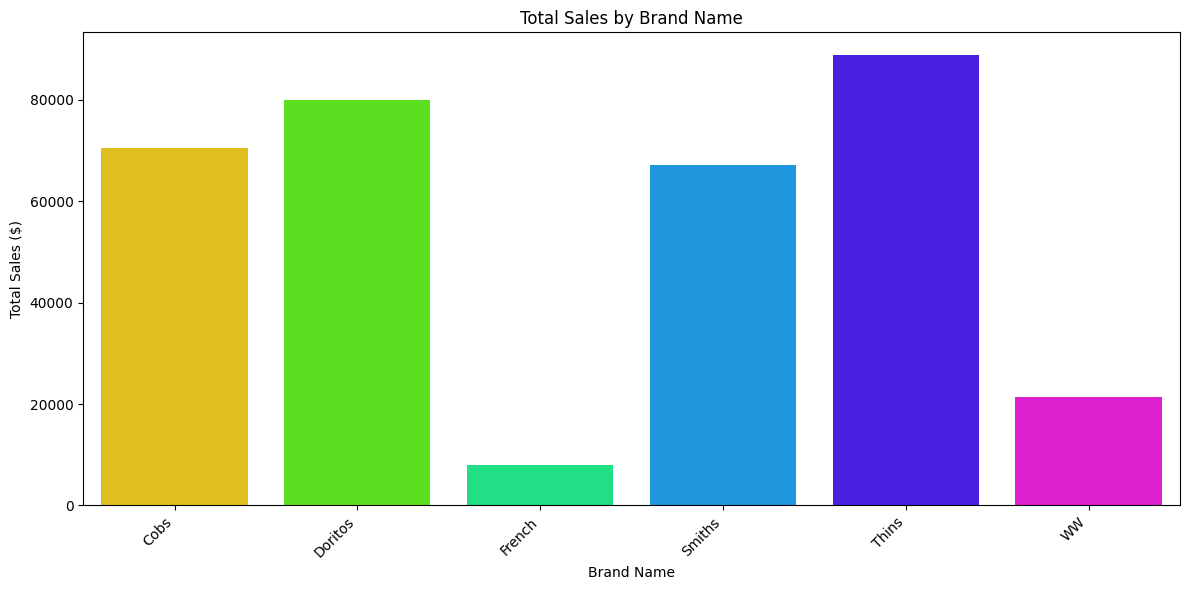

In [63]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='BRAND_NAME', y='TOT_SALES', data= total_sales_by_brand, palette='hsv')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- We can see `Thins` has the highest sales, significantly higher than other brand so we should ensure that we have stock according to its demand and we should invest marketing to further boost Thins brand presence.
- Many Brands such as `WW`, `French` have much lower sales so it requires targeted marketing strategies to increase visibility and appeal so we should consider promotions, discounts or advertising campaigns to boost sales.
- Brands like `Smiths`, `Doritos` & `Cobs` are also performing well. Let's Analyze why these brands are performing well...

In [64]:
# Calculate the average price per unit for each brand and Group by brand name and calculating average price per unit.

df_chips['PRICE_PER_UNIT'] = df_chips['TOT_SALES'] / df_chips['PROD_QTY']

avg_price_per_brand = df_chips.groupby('BRAND_NAME')['PRICE_PER_UNIT'].mean().reset_index()
avg_price_per_brand = avg_price_per_brand.sort_values(by='PRICE_PER_UNIT', ascending=True)
avg_price_per_brand

C:\Users\Utkarsh kumar singh\AppData\Local\Temp\ipykernel_18648\1396263712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chips['PRICE_PER_UNIT'] = df_chips['TOT_SALES'] / df_chips['PROD_QTY']


,BRAND_NAME,PRICE_PER_UNIT
5,WW,1.900000
2,French,3.000000
4,Thins,3.299742
0,Cobs,3.800000
3,Smiths,3.882238
1,Doritos,4.399768


- The Successful brands like `Smiths, Doritos & Cobs`are priced higher still performing well, it means customer finds the products more desirable and perceives as higher quality product so for brands like `Smiths, Doritos & Cobs`, we should invest more in marketing to highlight the quality and unique features.

In [60]:
total_sales_by_brand_and_customer_type = df_chips.groupby(['BRAND_NAME', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales_by_brand_and_customer_type

,BRAND_NAME,PREMIUM_CUSTOMER,TOT_SALES
0,Cobs,Budget,23780.4
1,Cobs,Mainstream,28363.2
2,Cobs,Premium,18426.2
3,Doritos,Budget,27764.0
4,Doritos,Mainstream,32208.0
5,Doritos,Premium,20002.4
6,French,Budget,3042.0
7,French,Mainstream,2829.0
8,French,Premium,2058.0
9,Smiths,Budget,24441.9


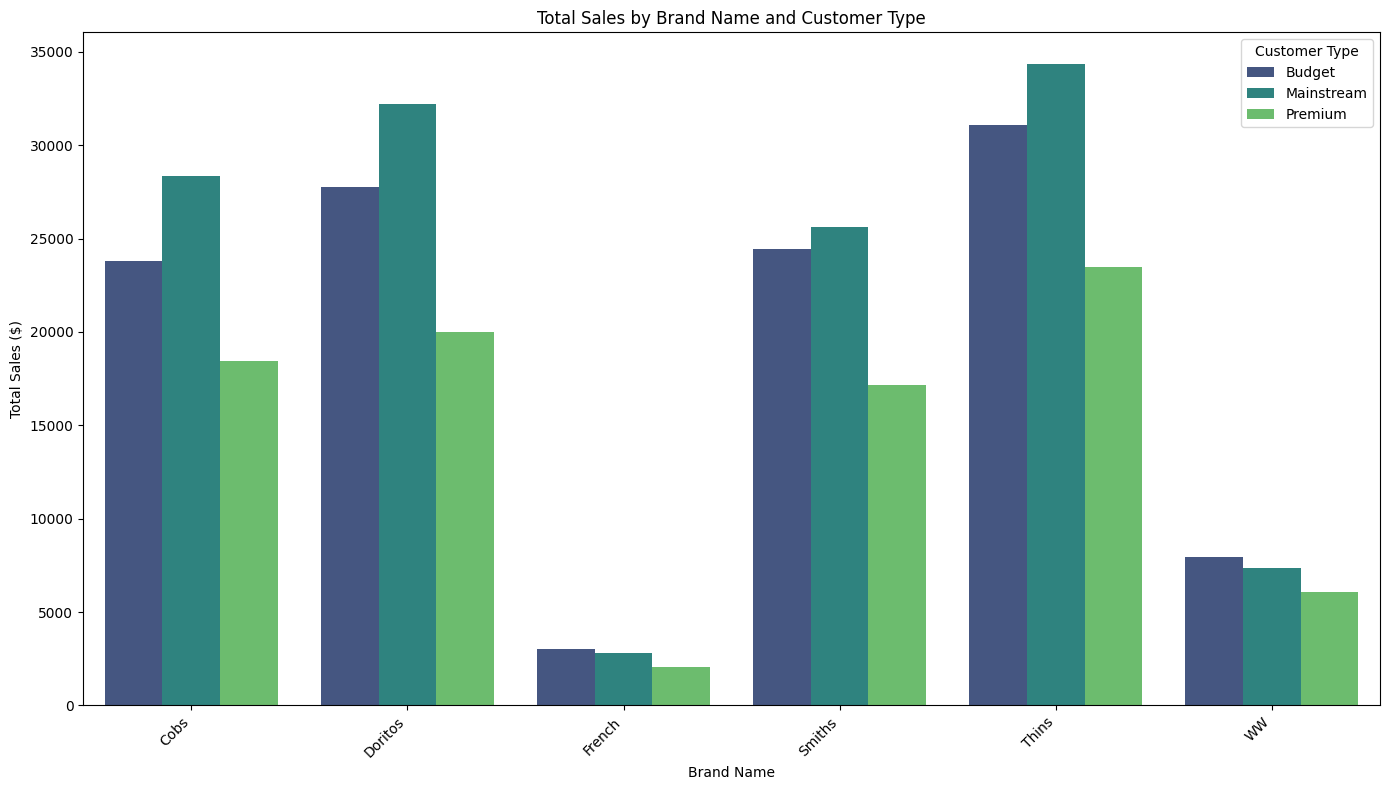

In [61]:
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='BRAND_NAME', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales_by_brand_and_customer_type, palette='viridis')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Brand Name and Customer Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


- I think Price isn't issue. `Thins, Smiths, Doritos & Cobs` aren't cater by premium customers also so these lower performing brands should adjust their pricing and improve the quality and spend some expenses on marketing to be more competitive in the market. Still let's check if package size is an factor..

In [65]:
# Total Sales by Brand and pack size

total_sales_by_brand_and_pack_size = df_chips.groupby(['PROD_SIZE'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=True)
total_sales_by_brand_and_pack_size.T

,1,4,5,0,3,2
PROD_SIZE,160,200,330,110,175,170
TOT_SALES,10647.6,10757.8,34804.2,70569.8,96781.5,112396.4


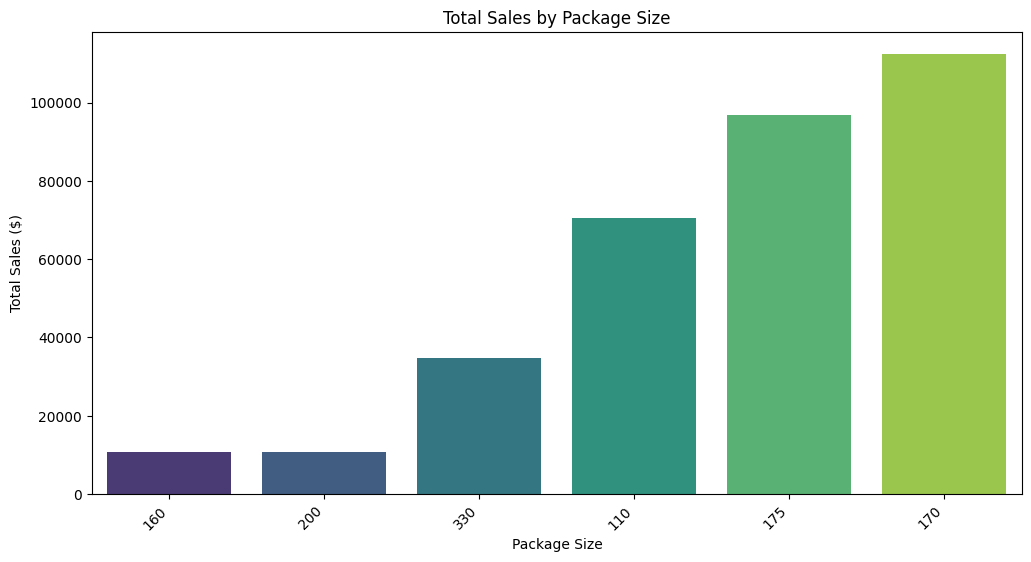

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_SIZE', y='TOT_SALES', data=total_sales_by_brand_and_pack_size, palette='viridis')
plt.xlabel('Package Size')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Package Size')
plt.xticks(rotation=45, ha='right')

plt.show()

- As we can see the highest sales with the pakage sizes `170g & 175g` so we can say that these are the most prefered package sizes and loved by customers.

### Conclusion from the Exploratory Data Analysis (EDA)

#### Key Findings:

1. **Customer Segmentation:**
   - **Top Segments:** `Older Families, Older Singles/Couples & Retirees` are the largest contributors to chip sales, with     `Older Families` leading in both total and per-segment sales.
   - **Moderate Segments:** `Young Families` display moderate spending, whereas `Midage Singles/Couples & Young Singles/Couples` have lower contributions.
   - **Lowest Segment:** `New Families` represent the smallest share of sales.
   
2. **Brand Performance:**
   - **Top Brands:** `Thins, Doritos, Smiths & Cobs` are popular, with `Thins` leading across most customer types.
   - **Underperforming Brands:** Brands like `French & WW` have relatively low sales, indicating a need for improved marketing or product positioning.

3. **Price Sensitivity:**
   - **Mainstream & Premium Customers:** Show consistent spending patterns, indicating a preference for quality over cost. `Budget customers` are significant contributors but require tailored value propositions.

4. **Package Size Preferences:**
   - **Top Sizes:** `170g and 175g` packages dominate sales, demonstrating a clear preference among customers.
   - **Moderate Performers:** Sizes like `110g and 200g` retain a smaller yet notable market presence.

5. **Sales Trends:**
   - A significant spike in sales was observed during late `December and early January`, likely driven by holiday promotions and events.
   - Temporary dips in sales suggest potential stockouts or short-term market conditions.


#### Strategic Recommendations:

1. **Enhance Top Brands:**
   - Increase marketing and stock availability for high-performing brands like `Thins, Doritos, Smiths & Cobs` to maximize revenue from loyal customers.

2. **Revise Lower-Performing Brands:**
   - Target brands with lower sales `(WW, French)` by adjusting pricing, enhancing quality, and investing in advertising to boost customer interest.

3. **Focus on Preferred Package Sizes:**
   - Prioritize `170g and 175g` packages in promotions and ensure steady stock levels to align with customer demand.

4. **Targeted Marketing Strategies:**
   - Offer exclusive deals for loyal `Older Families, Older Singles/Couples & Retirees` while engaging `Budget` segments (e.g., `New Families` and `Young Singles/Couples`) with discounts and combo packs.

5. Seasonal Campaigns:
   - Capitalize on holiday periods by launching limited-time offers and strategic advertisements to maximize the seasonal spikes.
   
These recommendations will help Julia align product offerings and marketing strategies with customer preferences, driving higher sales and satisfaction.